In [1]:
from langgraph.graph import StateGraph
from typing import TypedDict,List

In [2]:
class AgentState(TypedDict):
    name: str
    age: int
    skills: List[int]
    result: str

In [3]:
def greet(state:AgentState):
    """根据用户的名称生成问候语"""
    state['result'] = f"hi there {state['name']}!"
    return state

def age_check(state:AgentState):
    """检查用户的年龄是否合法"""
    if state['age'] < 18:
        state['result'] = state['result'] + "you are too young"
    else:
        state['result'] = state['result'] + "you are old enough"
    return state

def skill_check(state:AgentState):
    """描述用户的技能"""
    state['result'] = state['result'] + f"your skills are {state['skills']}"
    
    return state
    

In [6]:
graph = StateGraph(AgentState)
graph.add_node("greet", greet)
graph.add_node("age_check", age_check)
graph.add_node("skill_check", skill_check)
graph.set_entry_point("greet")
graph.add_edge("greet", "age_check")
graph.add_edge("age_check", "skill_check")
graph.set_finish_point("skill_check")
app = graph.compile()

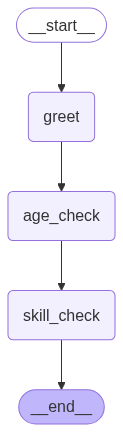

In [7]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
result = app.invoke({
    "name": "John",
    "age": 20,
    "skills": ["python", "java", "c++"],
})

print(result)


{'name': 'John', 'age': 20, 'skills': ['python', 'java', 'c++'], 'result': "hi there John!you are old enoughyour skills are ['python', 'java', 'c++']"}
